In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import dataset

In [26]:
cars = pd.read_csv('Toyoto_Corrola.csv')
cars.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


In [27]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         1436 non-null   int64 
 1   Model      1436 non-null   object
 2   Price      1436 non-null   int64 
 3   Age_08_04  1436 non-null   int64 
 4   KM         1436 non-null   int64 
 5   HP         1436 non-null   int64 
 6   Doors      1436 non-null   int64 
 7   Cylinders  1436 non-null   int64 
 8   Gears      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


In [28]:
cars.shape

(1436, 10)

In [29]:
cars.isna().sum()

Id           0
Model        0
Price        0
Age_08_04    0
KM           0
HP           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [30]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         1436 non-null   int64 
 1   Model      1436 non-null   object
 2   Price      1436 non-null   int64 
 3   Age_08_04  1436 non-null   int64 
 4   KM         1436 non-null   int64 
 5   HP         1436 non-null   int64 
 6   Doors      1436 non-null   int64 
 7   Cylinders  1436 non-null   int64 
 8   Gears      1436 non-null   int64 
 9   Weight     1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


# Removing unnecessary columns

In [31]:
cars1 = cars.drop(['Id','Model'], axis=1)

In [32]:
cars1

,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,13500,23,46986,90,3,4,5,1165
1,13750,23,72937,90,3,4,5,1165
2,13950,24,41711,90,3,4,5,1165
3,14950,26,48000,90,3,4,5,1165
4,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,3,4,5,1025
1432,10845,72,19000,86,3,4,5,1015
1433,8500,71,17016,86,3,4,5,1015
1434,7250,70,16916,86,3,4,5,1015


In [33]:
cars1.corr()

,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.185326,NaN,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.148359,NaN,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.036197,NaN,0.015023,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.092424,NaN,0.209477,0.089614
Doors,0.185326,-0.148359,-0.036197,0.092424,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.209477,-0.160141,NaN,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,0.089614,0.302618,NaN,0.020613,1.000000


# Scatterplot & histogram

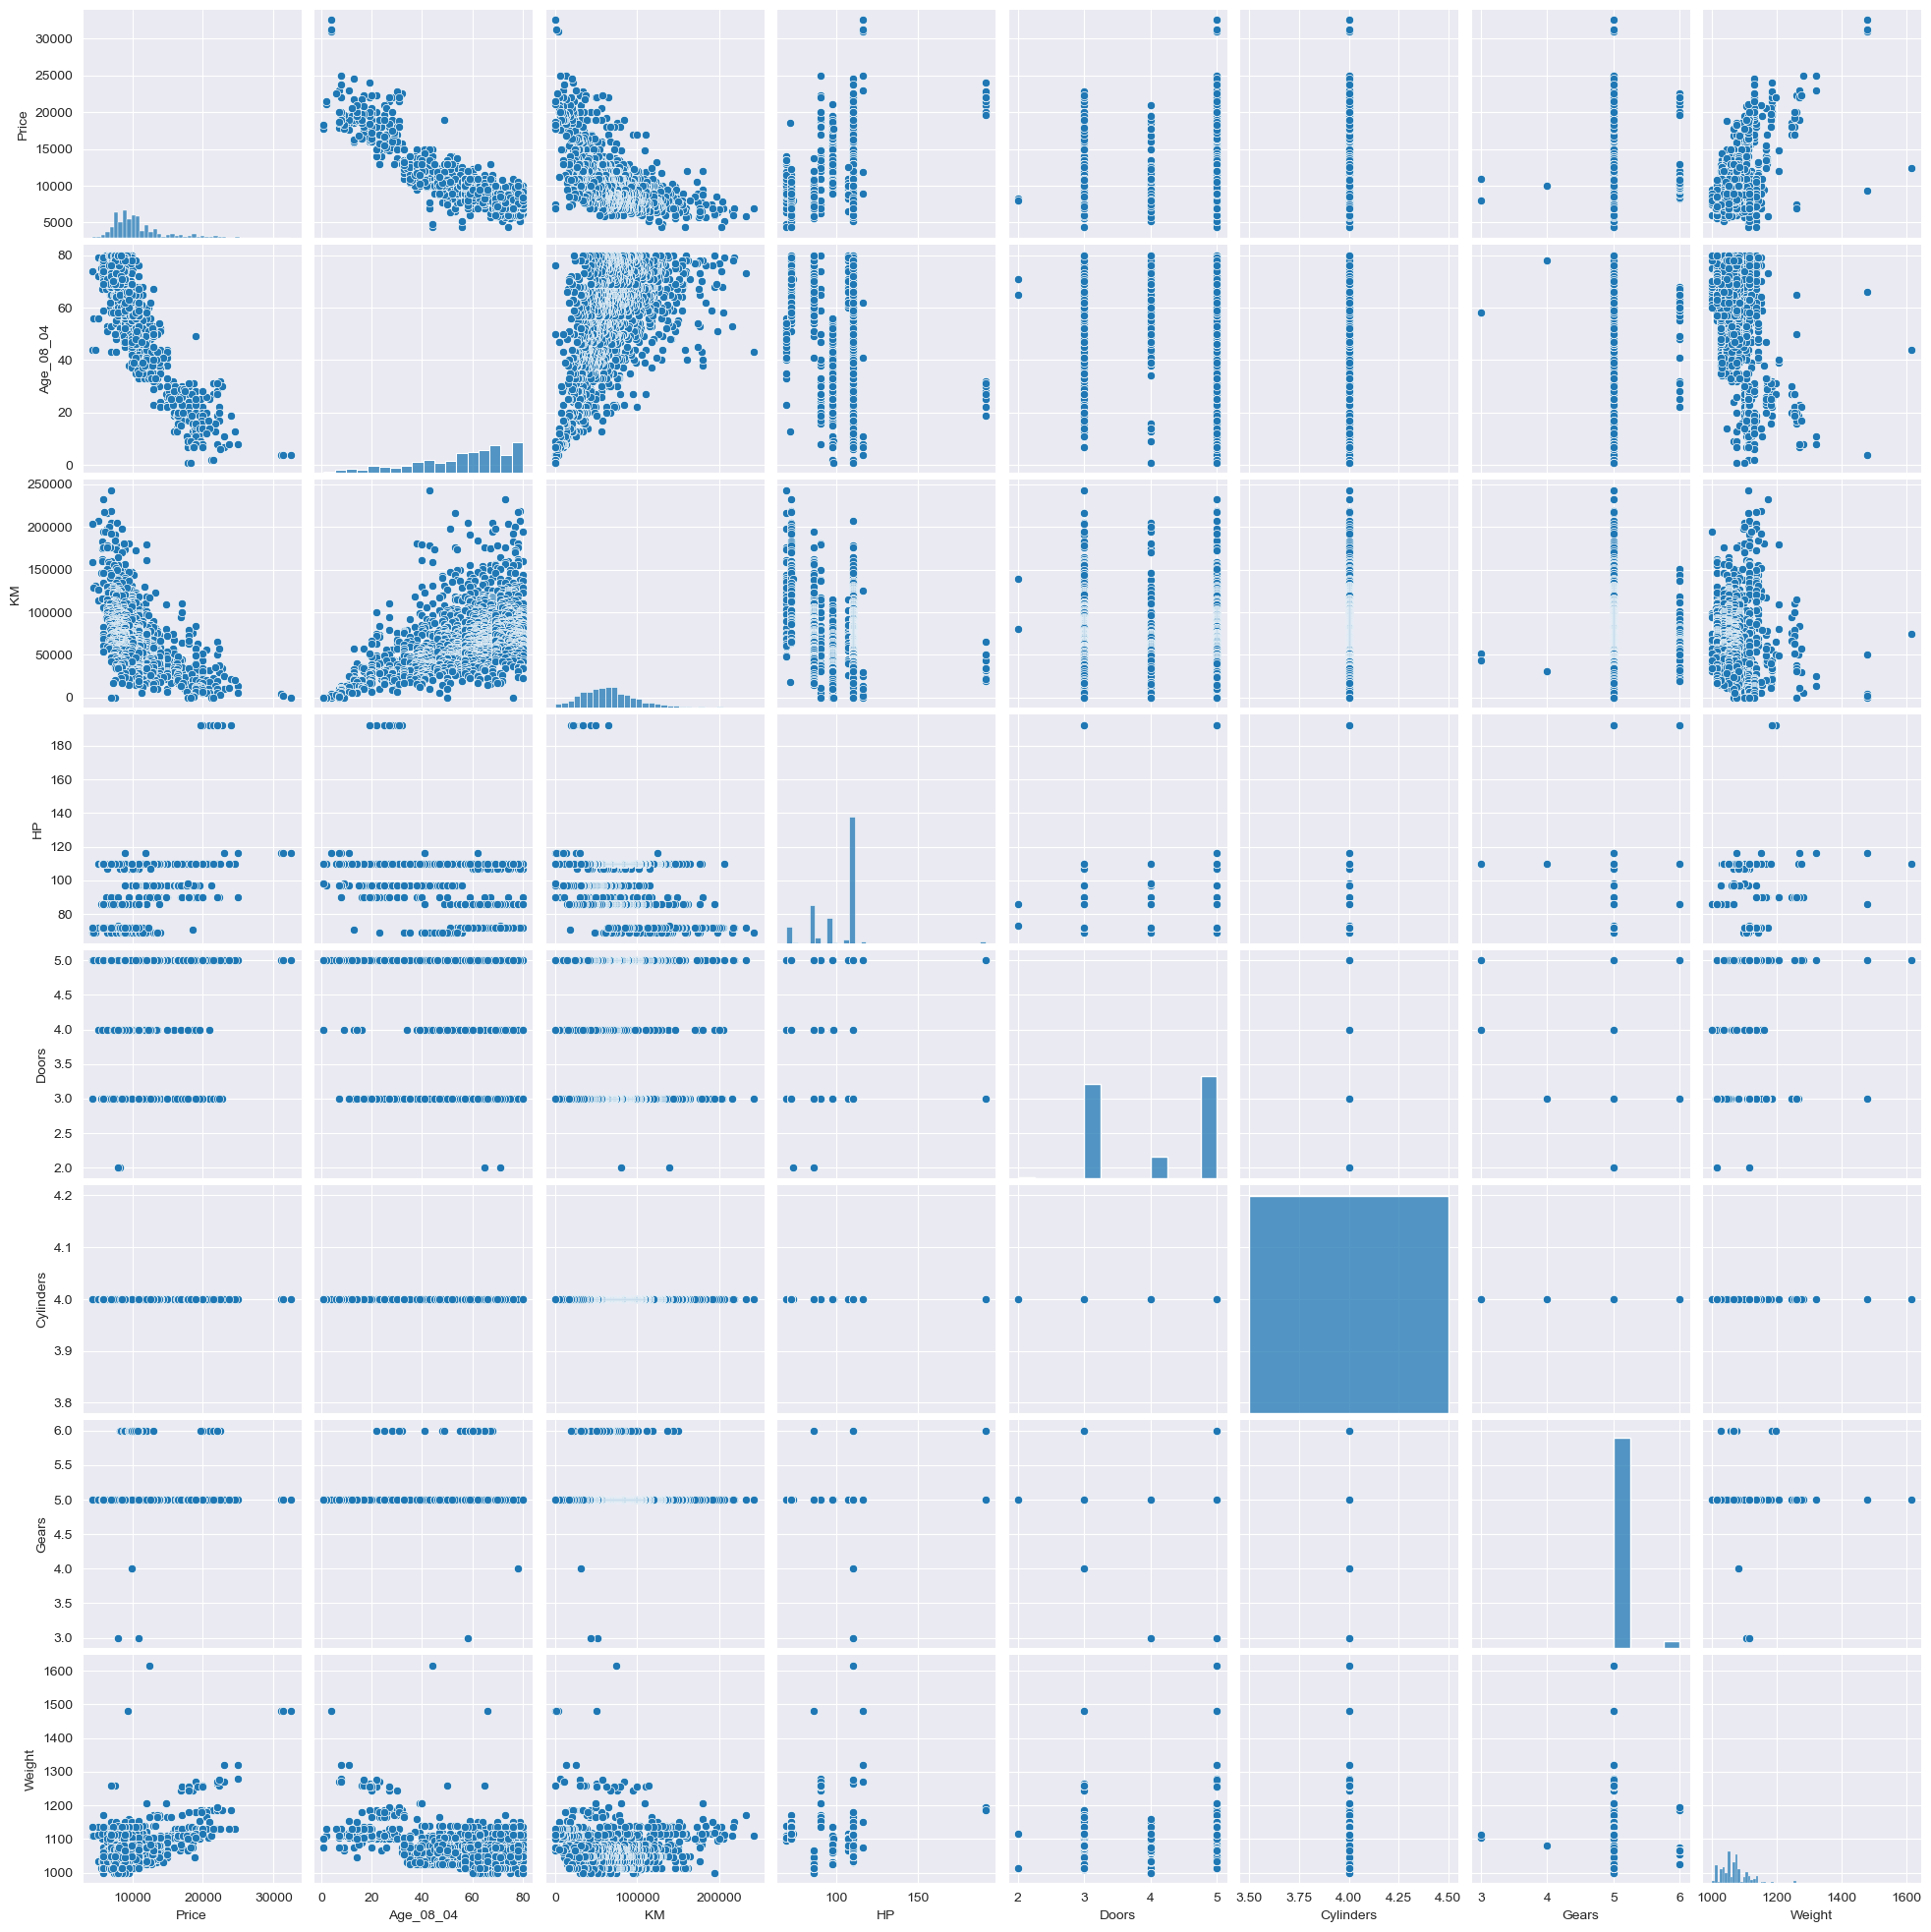

In [34]:
sns.set_style(style='darkgrid')
sns.pairplot(cars1)

# Prepare a model

In [35]:
import statsmodels.formula.api as smf

In [36]:
model = smf.ols('Price~Age_08_04+KM+HP+Doors+Cylinders+Gears+Weight', data=cars1).fit()

In [37]:
model.params

Intercept    -410.845504
Age_08_04    -122.242218
KM             -0.019994
HP             28.350149
Doors          -9.680229
Cylinders   -1643.382016
Gears         622.282925
Weight         18.609651
dtype: float64

In [38]:
model.tvalues, model.pvalues

(Intercept    -5.323309
 Age_08_04   -46.728942
 KM          -16.542560
 HP           10.842418
 Doors        -0.242055
 Cylinders    -5.323309
 Gears         3.152234
 Weight       22.446903
 dtype: float64,
 Intercept     1.181900e-07
 Age_08_04    4.387432e-290
 KM            2.238900e-56
 HP            2.231791e-26
 Doors         8.087723e-01
 Cylinders     1.181900e-07
 Gears         1.653931e-03
 Weight        7.856458e-96
 dtype: float64)

In [39]:
model.rsquared, model.rsquared_adj

(np.float64(0.8628024511073656), np.float64(0.8622263942190831))

# Simple linear regression model

In [40]:
model_doors = smf.ols('Price~Doors', data=cars1).fit()
model_doors.tvalues, model_doors.pvalues

(Intercept    19.258097
 Doors         7.141657
 dtype: float64,
 Intercept    1.094732e-73
 Doors        1.461237e-12
 dtype: float64)

# Calculating VIF: multi-colinearity

In [41]:
rsquared_Age_08_04 = smf.ols('Age_08_04~KM+HP+Doors+Cylinders+Gears+Weight', data=cars1).fit().rsquared
vif_Age_08_04 = 1/(1-rsquared_Age_08_04)

rsquared_KM = smf.ols('KM~Age_08_04+HP+Doors+Cylinders+Gears+Weight', data=cars1).fit().rsquared
vif_KM = 1/(1-rsquared_KM)

rsquared_HP = smf.ols('HP~KM+Age_08_04+Doors+Cylinders+Gears+Weight', data=cars1).fit().rsquared
vif_HP = 1/(1-rsquared_HP)

rsquared_Doors = smf.ols('Doors~KM+HP+Age_08_04+Cylinders+Gears+Weight', data=cars1).fit().rsquared
vif_Doors = 1/(1-rsquared_Doors)

rsquared_Cylinders = smf.ols('Cylinders~KM+HP+Doors+Age_08_04+Gears+Weight', data=cars1).fit().rsquared
vif_Cylinders = 1/(1-rsquared_Cylinders)

rsquared_Gears = smf.ols('Gears~KM+HP+Doors+Cylinders+Age_08_04+Weight', data=cars1).fit().rsquared
vif_Gears = 1/(1-rsquared_Gears)

rsquared_Weight = smf.ols('Weight~KM+HP+Doors+Cylinders+Gears+Age_08_04', data=cars1).fit().rsquared
vif_Weight = 1/(1-rsquared_Weight)

vif = {'Variables':['Age_08_04','KM','HP','Doors','Cylinders','Gears','Weight'],'Vif':[vif_Age_08_04, vif_KM, vif_HP, vif_Doors, vif_Cylinders, vif_Gears, vif_Weight]}
data_vif = pd.DataFrame(vif)
data_vif

C:\Users\sumit\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,Variables,Vif
0,Age_08_04,1.874542
1,KM,1.627039
2,HP,1.214909
3,Doors,1.149301
4,Cylinders,0.000000
5,Gears,1.096501
6,Weight,1.508041


# Residual analysis

## Test for normality of residual (Q-Q plot)

In [42]:
import statsmodels.api as sm

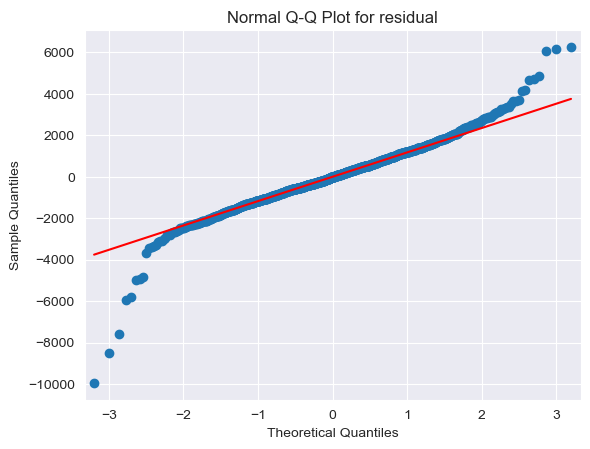

In [43]:
qqplot = sm.qqplot(model.resid, line='q')
plt.title('Normal Q-Q Plot for residual')
plt.show()

In [44]:
list[np.where(model.resid> 5000)]

list[array([109, 147, 523])]

In [45]:
list[np.where(model.resid< -5000)]

list[array([191, 192, 221, 601, 960])]

## Residual plot for homoscedasticity

In [46]:
def get_standardize_value(vals):
    return (vals - vals.mean())/vals.std()

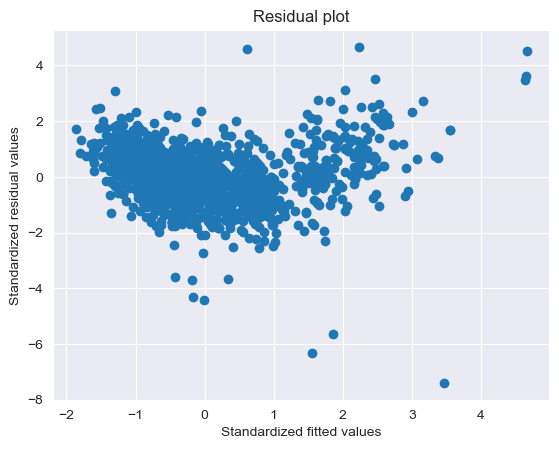

In [47]:
plt.scatter(get_standardize_value(model.fittedvalues),
               get_standardize_value(model.resid))
plt.title('Residual plot')
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Residual Vs regressors

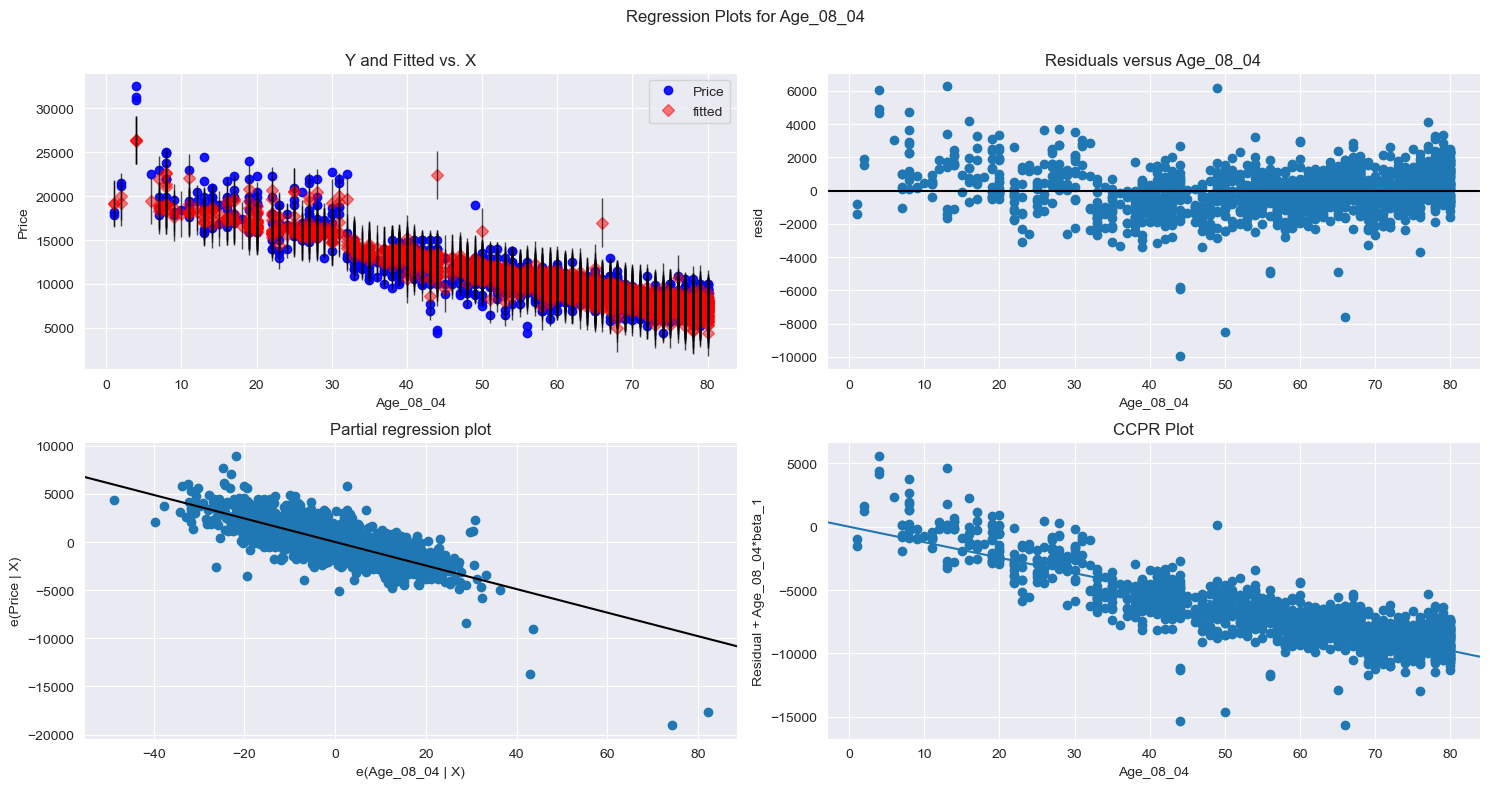

In [48]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'Age_08_04', fig)
plt.show()

**_show this for all other columns_**

# Model deletion diagnostics

## Cooks distance

In [50]:
(c,_) = model.get_influence().cooks_distance

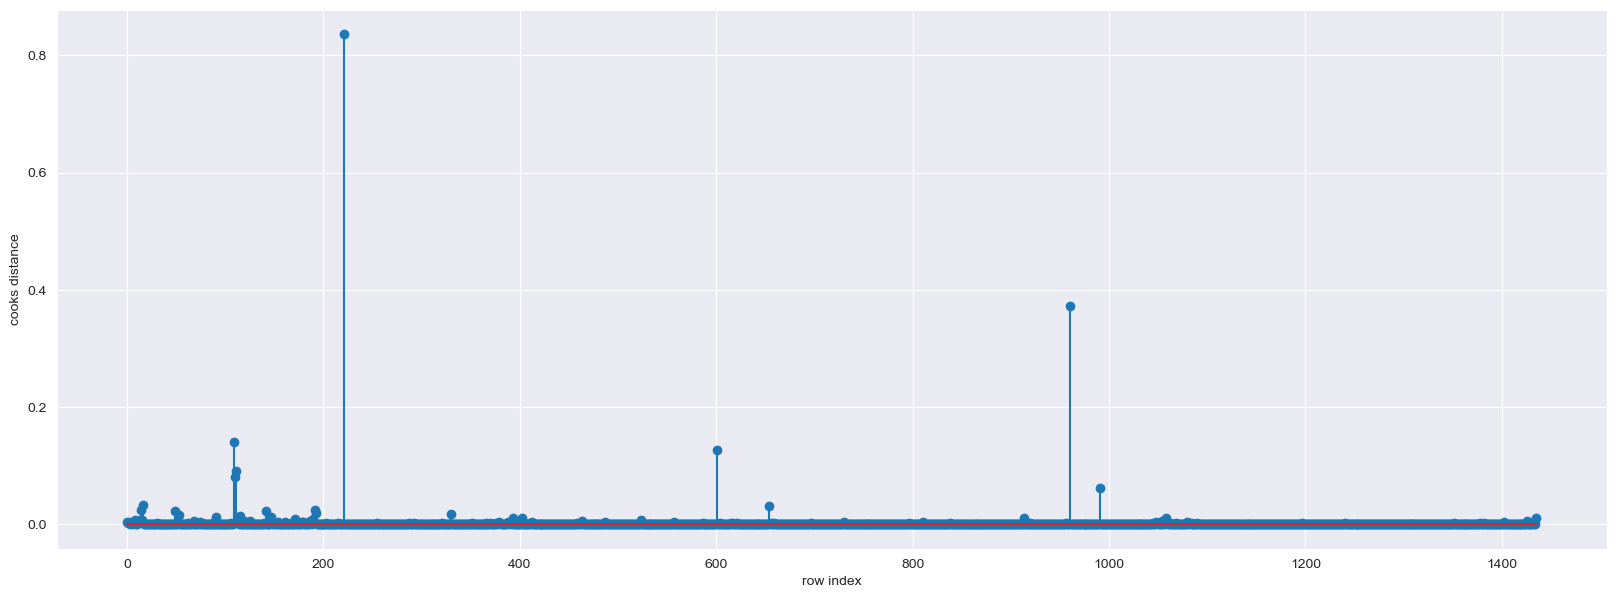

In [55]:
fig = plt.figure(figsize=(20,7))
plt.stem(np.arange(len(cars1)), np.round(c,3))
plt.xlabel('row index')
plt.ylabel('cooks distance')
plt.show()

In [56]:
np.argmax(c), np.max(c)

(np.int64(221), np.float64(0.8359007508851728))

## High influence plot

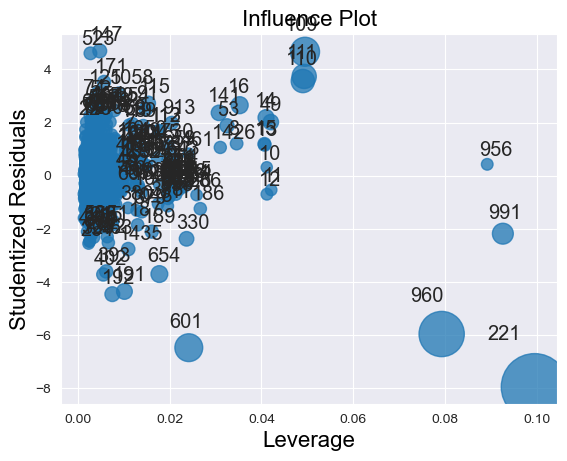

In [58]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [62]:
k = cars.shape[1]
n = cars.shape[0]
leverage_cutoff = 3*((k+1)/n)
leverage_cutoff

0.02298050139275766